In [1]:
import sys
sys.path.append('../')

from miquants_demo.data_collection.PriceLoader import load_stock_data,load_index_data
from miquants_demo.data_collection.UniverseLoader import get_vn30_list
from miquants_demo.selection import XSMOM
from miquants_demo.utils.metrics import calc_performance_metrics_subset,calc_sharpe_by_year


import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from empyrical import stats
import seaborn as sns

In [2]:
help(XSMOM.XSMOM)

Help on class XSMOM in module miquants_demo.selection.XSMOM:

class XSMOM(builtins.object)
 |  XSMOM(prices, xsmom_type='winner', duration='M', portfolio_num=5, offset=2, lookback=6, transaction_cost=0.001)
 |  
 |  Methods defined here:
 |  
 |  __init__(self, prices, xsmom_type='winner', duration='M', portfolio_num=5, offset=2, lookback=6, transaction_cost=0.001)
 |      Initialize self.  See help(type(self)) for accurate signature.
 |  
 |  get_portfolio(self)
 |  
 |  run(self)
 |  
 |  ----------------------------------------------------------------------
 |  Data descriptors defined here:
 |  
 |  __dict__
 |      dictionary for instance variables (if defined)
 |  
 |  __weakref__
 |      list of weak references to the object (if defined)



In [3]:
vn30 = get_vn30_list()

In [18]:
start = '2019-01-01'
end = '2023-01-31'
vnindex = load_index_data('vnindex',start,end)
vnindex.index = pd.to_datetime(vnindex.index)

In [19]:
prices = pd.DataFrame()
for name in vn30:
    stock = load_stock_data(name,start,end)
    prices[name] =stock.close

In [20]:
prices.index = pd.to_datetime(prices.index)
prices

,ACB,BCM,BID,BVH,CTG,FPT,GAS,GVR,HDB,HPG,...,TCB,TPB,VCB,VHM,VIB,VIC,VJC,VNM,VPB,VRE
tradingDate,,,,,,,,,,,,,,,,,,,,,
2019-01-02,11057.0,21600.0,25206.0,80016.0,14167.0,20924.0,74836.0,8500.0,10938.0,10784.0,...,25600.0,12095.0,40799.0,53515.0,6200.0,89246.0,115982.0,86951.0,7186.0,27973.0
2019-01-03,10641.0,21300.0,24078.0,80196.0,13496.0,20720.0,73025.0,8400.0,10919.0,10329.0,...,25000.0,11822.0,40799.0,53296.0,6100.0,89157.0,115189.0,86179.0,7038.0,26905.0
2019-01-04,10716.0,21300.0,23739.0,79656.0,13682.0,20873.0,72853.0,8400.0,11248.0,10399.0,...,24950.0,11792.0,41408.0,53879.0,6100.0,89423.0,114000.0,87652.0,7019.0,26711.0
2019-01-07,10868.0,18900.0,24303.0,79656.0,13533.0,21228.0,74405.0,8200.0,11210.0,10276.0,...,25100.0,11913.0,41560.0,54024.0,6100.0,89779.0,114991.0,91859.0,7131.0,27099.0
2019-01-08,10792.0,21400.0,24078.0,79297.0,13347.0,21330.0,76129.0,8200.0,11054.0,10101.0,...,25100.0,11943.0,41864.0,54024.0,6100.0,89779.0,114000.0,91158.0,7094.0,26808.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-01-18,25500.0,84500.0,45100.0,48400.0,30750.0,83400.0,104300.0,16000.0,17450.0,21700.0,...,29100.0,23600.0,90000.0,52500.0,21913.0,56700.0,112300.0,81300.0,19650.0,29300.0
2023-01-19,26000.0,84300.0,45950.0,49900.0,31100.0,83900.0,104500.0,16300.0,17500.0,21150.0,...,29100.0,24000.0,93000.0,52200.0,21913.0,57400.0,114500.0,81300.0,19500.0,29650.0
2023-01-27,26350.0,85200.0,44550.0,51000.0,30350.0,84000.0,108200.0,16850.0,17700.0,21500.0,...,29050.0,24500.0,93000.0,53300.0,22344.0,59200.0,116200.0,80000.0,19700.0,30300.0


In [21]:
winner = XSMOM.XSMOM(prices,xsmom_type='winner',duration='M',lookback=6,offset=2,portfolio_num=5)
winner.get_portfolio()

{'2019-09-30': ['VCB', 'GVR', 'MWG', 'VRE', 'PDR'],
 '2019-10-31': ['GVR', 'BCM', 'FPT', 'MWG', 'VCB'],
 '2019-11-30': ['MWG', 'FPT', 'BCM', 'VCB', 'VJC'],
 '2019-12-31': ['MWG', 'FPT', 'GVR', 'VCB', 'BCM'],
 '2020-01-31': ['BID', 'FPT', 'VCB', 'MWG', 'BCM'],
 '2020-02-29': ['BID', 'FPT', 'VCB', 'VIB', 'MWG'],
 '2020-03-31': ['BID', 'VPB', 'CTG', 'VCB', 'FPT'],
 '2020-04-30': ['VPB', 'CTG', 'BID', 'ACB', 'STB'],
 '2020-05-31': ['PDR', 'NVL', 'CTG', 'BID', 'VPB'],
 '2020-06-30': ['PDR', 'HPG', 'VPB', 'CTG', 'BID'],
 '2020-07-31': ['PDR', 'HPG', 'VPB', 'CTG', 'STB'],
 '2020-08-31': ['HPG', 'STB', 'PDR', 'GVR', 'NVL'],
 '2020-09-30': ['NVL', 'HPG', 'VIB', 'PDR', 'MSN'],
 '2020-10-31': ['BCM', 'HPG', 'PDR', 'VIB', 'NVL'],
 '2020-11-30': ['BCM', 'VIB', 'HPG', 'STB', 'SSI'],
 '2020-12-31': ['VIB', 'HPG', 'PDR', 'BCM', 'ACB'],
 '2021-01-31': ['VIB', 'BCM', 'PDR', 'HPG', 'ACB'],
 '2021-02-28': ['GVR', 'SSI', 'PDR', 'VIB', 'HPG'],
 '2021-03-31': ['GVR', 'PDR', 'BCM', 'SSI', 'VIB'],
 '2021-04-30

In [22]:
loser = XSMOM.XSMOM(prices,xsmom_type='loser',duration='M',lookback=6,offset=2,portfolio_num=5)
loser.get_portfolio()

{'2019-09-30': ['SSI', 'STB', 'POW', 'HDB', 'TCB'],
 '2019-10-31': ['STB', 'TCB', 'BVH', 'POW', 'SSI'],
 '2019-11-30': ['HPG', 'STB', 'POW', 'SSI', 'BVH'],
 '2019-12-31': ['POW', 'SSI', 'MSN', 'HPG', 'BVH'],
 '2020-01-31': ['STB', 'SAB', 'POW', 'SSI', 'MSN'],
 '2020-02-29': ['BVH', 'SAB', 'SSI', 'POW', 'MSN'],
 '2020-03-31': ['GVR', 'SAB', 'POW', 'BVH', 'MSN'],
 '2020-04-30': ['GAS', 'BVH', 'BCM', 'MSN', 'SAB'],
 '2020-05-31': ['SSI', 'GAS', 'BVH', 'SAB', 'MWG'],
 '2020-06-30': ['MBB', 'MWG', 'BVH', 'SAB', 'GAS'],
 '2020-07-31': ['VJC', 'MBB', 'MWG', 'GAS', 'BVH'],
 '2020-08-31': ['GAS', 'VRE', 'MWG', 'SAB', 'BVH'],
 '2020-09-30': ['MBB', 'VJC', 'BID', 'BVH', 'MWG'],
 '2020-10-31': ['MBB', 'MWG', 'VPB', 'VIC', 'VJC'],
 '2020-11-30': ['BVH', 'NVL', 'MSN', 'VIC', 'VJC'],
 '2020-12-31': ['BVH', 'VRE', 'BID', 'POW', 'VJC'],
 '2021-01-31': ['VIC', 'BID', 'VJC', 'VRE', 'POW'],
 '2021-02-28': ['VIC', 'VHM', 'VNM', 'VJC', 'NVL'],
 '2021-03-31': ['VNM', 'GAS', 'VIC', 'BID', 'SAB'],
 '2021-04-30

In [23]:
winner_rets = winner.run()

2019-09-30 2019-10-31
['VCB', 'GVR', 'MWG', 'VRE', 'PDR'] 

2019-10-31 2019-11-30
['GVR', 'BCM', 'FPT', 'MWG', 'VCB'] 

2019-11-30 2019-12-31
['MWG', 'FPT', 'BCM', 'VCB', 'VJC'] 

2019-12-31 2020-01-31
['MWG', 'FPT', 'GVR', 'VCB', 'BCM'] 

2020-01-31 2020-02-29
['BID', 'FPT', 'VCB', 'MWG', 'BCM'] 

2020-02-29 2020-03-31
['BID', 'FPT', 'VCB', 'VIB', 'MWG'] 

2020-03-31 2020-04-30
['BID', 'VPB', 'CTG', 'VCB', 'FPT'] 

2020-04-30 2020-05-31
['VPB', 'CTG', 'BID', 'ACB', 'STB'] 

2020-05-31 2020-06-30
['PDR', 'NVL', 'CTG', 'BID', 'VPB'] 

2020-06-30 2020-07-31
['PDR', 'HPG', 'VPB', 'CTG', 'BID'] 

2020-07-31 2020-08-31
['PDR', 'HPG', 'VPB', 'CTG', 'STB'] 

2020-08-31 2020-09-30
['HPG', 'STB', 'PDR', 'GVR', 'NVL'] 

2020-09-30 2020-10-31
['NVL', 'HPG', 'VIB', 'PDR', 'MSN'] 

2020-10-31 2020-11-30
['BCM', 'HPG', 'PDR', 'VIB', 'NVL'] 

2020-11-30 2020-12-31
['BCM', 'VIB', 'HPG', 'STB', 'SSI'] 

2020-12-31 2021-01-31
['VIB', 'HPG', 'PDR', 'BCM', 'ACB'] 

2021-01-31 2021-02-28
['VIB', 'BCM', 'PD

In [24]:
loser_rets = loser.run()

2019-09-30 2019-10-31
['SSI', 'STB', 'POW', 'HDB', 'TCB'] 

2019-10-31 2019-11-30
['STB', 'TCB', 'BVH', 'POW', 'SSI'] 

2019-11-30 2019-12-31
['HPG', 'STB', 'POW', 'SSI', 'BVH'] 

2019-12-31 2020-01-31
['POW', 'SSI', 'MSN', 'HPG', 'BVH'] 

2020-01-31 2020-02-29
['STB', 'SAB', 'POW', 'SSI', 'MSN'] 

2020-02-29 2020-03-31
['BVH', 'SAB', 'SSI', 'POW', 'MSN'] 

2020-03-31 2020-04-30
['GVR', 'SAB', 'POW', 'BVH', 'MSN'] 

2020-04-30 2020-05-31
['GAS', 'BVH', 'BCM', 'MSN', 'SAB'] 

2020-05-31 2020-06-30
['SSI', 'GAS', 'BVH', 'SAB', 'MWG'] 

2020-06-30 2020-07-31
['MBB', 'MWG', 'BVH', 'SAB', 'GAS'] 

2020-07-31 2020-08-31
['VJC', 'MBB', 'MWG', 'GAS', 'BVH'] 

2020-08-31 2020-09-30
['GAS', 'VRE', 'MWG', 'SAB', 'BVH'] 

2020-09-30 2020-10-31
['MBB', 'VJC', 'BID', 'BVH', 'MWG'] 

2020-10-31 2020-11-30
['MBB', 'MWG', 'VPB', 'VIC', 'VJC'] 

2020-11-30 2020-12-31
['BVH', 'NVL', 'MSN', 'VIC', 'VJC'] 

2020-12-31 2021-01-31
['BVH', 'VRE', 'BID', 'POW', 'VJC'] 

2021-01-31 2021-02-28
['VIC', 'BID', 'VJ

In [25]:
vnindex = load_index_data('VNINDEX',(winner_rets.index[0]).strftime("%Y-%m-%d"),winner_rets.index[-1].strftime("%Y-%m-%d"))
vnindex = vnindex['close'].pct_change()
vnindex.index = pd.to_datetime(vnindex.index)

In [26]:
compare= pd.DataFrame({'winner':winner_rets['xsmom'],'loser':loser_rets['xsmom'],'vnindex':vnindex})
compare.fillna(0,inplace=True)
compare

,winner,loser,vnindex
2019-10-01,0.000000,0.000000,0.000000
2019-10-02,-0.012036,-0.001583,-0.008403
2019-10-03,-0.003282,-0.002913,0.001271
2019-10-04,-0.001105,-0.008908,-0.004897
2019-10-07,-0.009000,-0.004917,-0.004557
...,...,...,...
2023-02-23,0.003963,0.002107,-0.000588
2023-02-24,-0.005536,-0.028311,-0.013382
2023-02-27,-0.007308,-0.032662,-0.017613
2023-02-28,0.005262,-0.006791,0.003359


[]

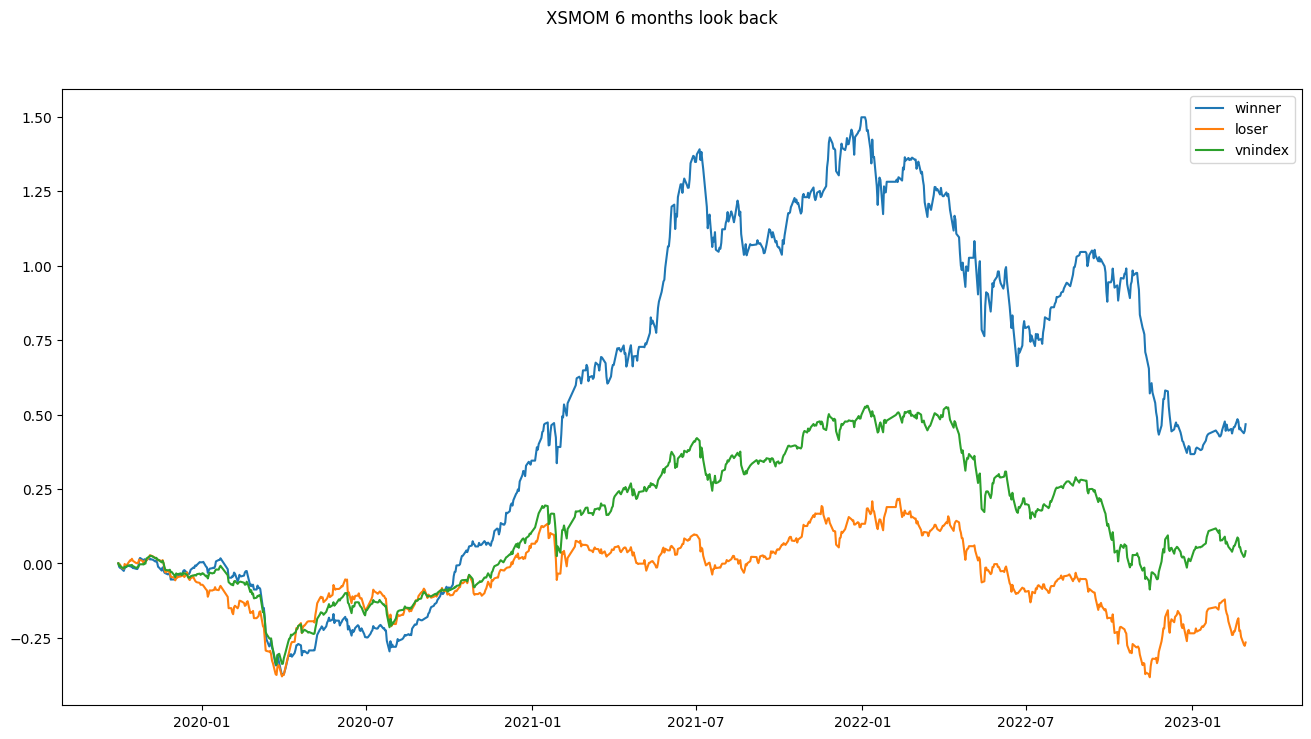

In [27]:
fig,ax=plt.subplots(1,1,figsize=(16,8))
fig.suptitle('XSMOM vs. VNINDEX')
ax.plot(stats.cum_returns(compare.winner),label='winner')
ax.plot(stats.cum_returns(compare.loser),label='loser')
ax.plot(stats.cum_returns(compare.vnindex),label='vnindex')
fig.suptitle('XSMOM 6 months look back')
plt.legend()
plt.plot()

In [28]:
xxx = calc_performance_metrics_subset(compare)
metrics = pd.DataFrame({'Annual return':xxx['annual_return'],'Annual volatility':xxx['annual_volatility'],'Downside risk':xxx['downside_risk'],'Max drawdown':xxx['max_drawdown'].to_list()})
metrics = metrics.applymap("{0:.2%}".format)
metrics.T

,winner,loser,vnindex
Annual return,11.98%,-8.71%,1.19%
Annual volatility,26.11%,26.62%,22.12%
Downside risk,19.50%,20.41%,17.10%
Max drawdown,45.29%,49.28%,40.34%


In [30]:
x1 = calc_sharpe_by_year(compare[['winner']].rename(columns={'winner':'captured_returns'}))
x2 = calc_sharpe_by_year(compare[['loser']].rename(columns={'loser':'captured_returns'}))
x3 = calc_sharpe_by_year(compare[['vnindex']].rename(columns={'vnindex':'captured_returns'}))
sharpe_df = pd.DataFrame({'Winner':x1,'Loser':x2,'Vnindex':x3})
sharpe_df[:-1]

,Winner,Loser,Vnindex
sharpe_ratio_2019,0.176980,-2.419518,-1.761815
sharpe_ratio_2020,1.190735,0.639884,0.723412
sharpe_ratio_2021,2.651682,0.393596,1.567952
sharpe_ratio_2022,-1.953432,-1.099466,-1.493727


In [34]:
import scipy
ts = stock.close.pct_change().dropna()

ts1 = compare['winner']
ts2 =compare['loser']
ts3 = compare['vnindex']

statistics1 = scipy.stats.describe(ts1)
statistics2 = scipy.stats.describe(ts2)
statistics3 = scipy.stats.describe(ts3)

moment_compare = pd.DataFrame(index=['mean','std','skewness','kurtosis'],columns=['Winner','Loser','Vnindex'])
moment_compare.loc['mean',:]=round(statistics1.mean,4),round(statistics2.mean,4),round(statistics3.mean,4)
moment_compare.loc['std',:]=round(np.sqrt(statistics1.variance),4),round(np.sqrt(statistics2.variance),4),round(np.sqrt(statistics3.variance),4)
moment_compare.loc['skewness',:]=round(statistics1.skewness,4),round(statistics2.skewness,4),round(statistics3.skewness,4)
moment_compare.loc['kurtosis',:]=round(statistics1.kurtosis,4),round(statistics2.kurtosis,4),round(statistics3.kurtosis,4)
moment_compare

,Winner,Loser,Vnindex
mean,0.0006,-0.0002,0.0001
std,0.0164,0.0168,0.0139
skewness,-0.7198,-0.6301,-0.8858
kurtosis,2.651,2.834,3.4042


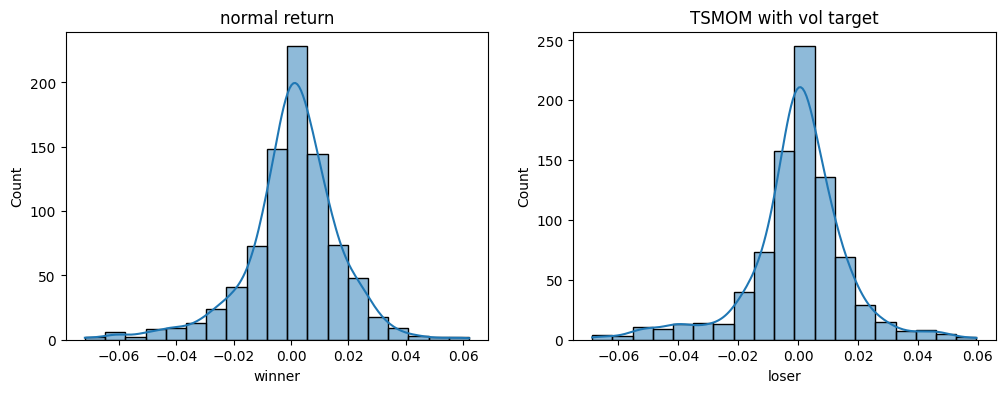

In [35]:
fig,(ax1,ax2)=plt.subplots(1,2,figsize=(12,4))
bins = 19
sns.histplot(ts1,bins=bins,kde=True,ax=ax1)
ax1.title.set_text('normal return')

sns.histplot(ts2,bins=bins,kde=True,ax=ax2)
ax2.title.set_text('TSMOM with vol target')



plt.show()